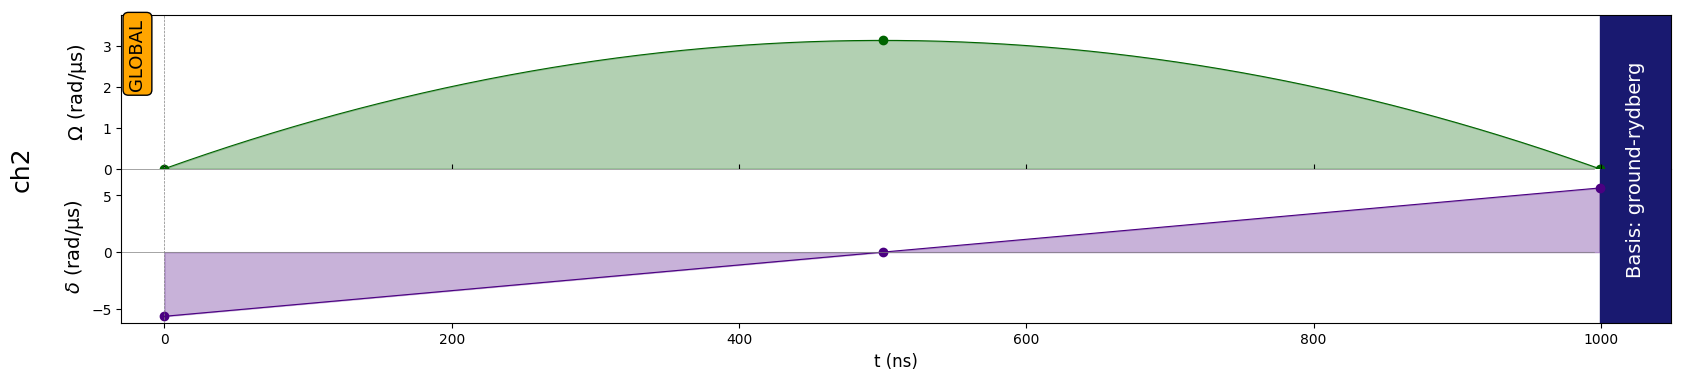

In [61]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipEmulator


reg = Register({
  "q0": (5.21712861,  37.4016466),
  "q1": (-41.40546821,  -9.55017352),
  "q2": (-42.81272715,   3.62854895),
  "q3": (14.25982955,  27.71166144),
  "q4": (23.30146157,  18.02067889),
})

seq = Sequence(reg, MockDevice)
seq.declare_channel("ch2", "rydberg_global")

values = [1e-9,3.141592653589793,1e-9]
times = [0,0.5,1]
amp1 = InterpolatedWaveform(1000, values, times)
values_1 = [-5.655160632869887,-0.00029385640826766626,5.654572920053373]
times_1 = [0,0.5,1]
det1 = InterpolatedWaveform(1000, values_1, times_1)
pulse1 = Pulse(amp1, det1, 0)

seq.add(pulse1, "ch2")
seq.measure("ground-rydberg")

seq.draw()

In [62]:
simul = QutipEmulator.from_sequence(seq, sampling_rate=0.1)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

In [63]:
count_dict

# a = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

Counter({'11111': 177,
         '11110': 85,
         '01111': 80,
         '11101': 68,
         '10111': 65,
         '11011': 58,
         '11001': 38,
         '00111': 35,
         '01110': 34,
         '11100': 33,
         '10110': 32,
         '01101': 31,
         '10011': 30,
         '10101': 28,
         '11010': 28,
         '01011': 27,
         '00110': 16,
         '01010': 15,
         '01001': 14,
         '10001': 13,
         '11000': 13,
         '00011': 12,
         '10010': 11,
         '10100': 11,
         '00010': 9,
         '01100': 9,
         '00100': 8,
         '00101': 7,
         '01000': 4,
         '10000': 4,
         '00001': 3,
         '00000': 2})